First Come First Serve Scheduling Algorithm (Non-Preemptive) 

First Come First Serve Algorithm (NON-PREEMPTIVE)

Processes     Burst time     Waiting time      Turn around time
 1		24		 0		 24
 2		3		 24		 27
 3		3		 27		 30
1. Process Order: P1,P2,P3
2. Completion Order: 0,24,27,30
3. Waiting time: 0,24,27
4. Processes with wait time: ('P1', 0),('P2', 24),('P3', 27)
5. Average Waiting  time: 17.0
6. Average turn around  time: 27.0


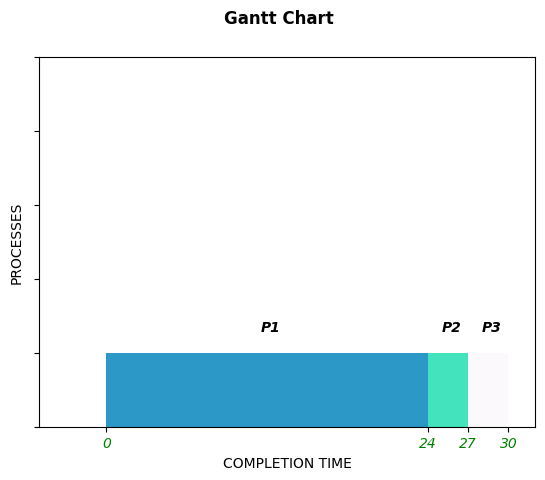

In [1]:
import matplotlib.pyplot as plt
from matplotlib.axis import Axis
import random
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# FCFS scheduling Non Preemptive
def drawGantt(processes,wt,tat,total_wt,total_tat):
    # Declaring a figure "gnt", # Setting Y-axis limits, X-axis limits, # Setting labels for x-axis and y-axis
    totaltime = []
    fig, gnt = plt.subplots()
    ax = plt.gca()
    
    plt.ylabel("Processes")
    plt.xlabel("X Label")
    
    gnt.set_xlim(-5, wt[-1]+5)
    gnt.set_ylim(0, 5)
    
    gnt.set_xlabel('COMPLETION TIME')
    gnt.set_ylabel('PROCESSES')
    
    totaltime = wt.copy()
    totaltime.append(tat[-1])
    
    ax.axes.yaxis.set_ticklabels([])
    ax.set_xticks(totaltime)
    ax.set_xticklabels(labels = totaltime, fontstyle='italic', color='green')
    
    # Setting graph attribute
    #gnt.grid(True)
    
    
    no_of_colors=n
    colors=["#"+''.join([random.choice('0123456789ABCDEF') for i in range(6)])for j in range(no_of_colors)]
    
    processorder = []
    for i in processes:
        processorder.append("P"+str(i))
            
    # Declaring a bar in schedule
    i = 0
    while i < len(wt):
        ax.text((wt[i]+(totaltime[i+1]-wt[i])/2)-0.5, 1.3, processorder[i], style='italic',weight='bold')
        gnt.broken_barh([(totaltime[i], totaltime[i+1]-totaltime[i])], (0, 1), facecolors =(colors[i]))
        i += 1
        
    merge = list(zip((processorder), (wt)))
    
    print("1. Process Order: "+ str(",".join(str(item) for item in processorder)))
    print("2. Completion Order: "+ str(",".join(str(item) for item in totaltime)))
    print("3. Waiting time: "+ str(",".join(str(item) for item in wt)) )
    print ("4. Processes with wait time: " +  str(",".join(str(item) for item in merge)))
    print("5. Average Waiting  time: "+ str(total_wt / n) )
    print("6. Average turn around  time: "+ str(total_tat / n) )
    fig.suptitle('Gantt Chart\n', fontweight ="bold")

    return(plt.savefig("fcfsgantt.png"))

# find the waiting time for all processes
def waitingTime(processes, n, bt, wt):
 
    # waiting time for 1st process is 0
    wt[0] = 0
 
    # waiting time
    for i in range(1, n ):
        wt[i] = bt[i - 1] + wt[i - 1]
 
# turn around time
def turnAroundTime(processes, n, bt, wt, tat):
 
    # calculating turnaround time by adding bt[i] + wt[i]
    for i in range(n):
        tat[i] = bt[i] + wt[i]
 
# average time
# average time
def avgTime( processes, n, bt):
 
    wt = [0] * n
    tat = [0] * n
    total_wt = 0
    total_tat = 0
 
    # find waiting time of all processes
    waitingTime(processes, n, bt, wt)
 
    # find turn around time for all processes
    turnAroundTime(processes, n, bt, wt, tat)
 
    # Display processes and calculated values
    print( color.BOLD + color.UNDERLINE+"First Come First Serve Algorithm (NON-PREEMPTIVE)\n"+color.END)
    print( color.BOLD +"Processes     Burst time     Waiting time      Turn around time"+color.END)
 
    # calculate total waiting time, total turn around time
    for i in range(n):
     
        total_wt = total_wt + wt[i]
        total_tat = total_tat + tat[i]
        print(" " + str(i + 1) + "\t\t" +str(bt[i]) + "\t\t " +str(wt[i]) + "\t\t " +str(tat[i]))
    
    #ganttchart
    fcfs_gantt  = drawGantt(processes,wt,tat,total_wt,total_tat)

# Start
if __name__ =="__main__":
    
    #read file line by line to get input of algorithm
    filedata = []
    filepath = 'fcfs.txt'
    with open(filepath) as fp:
        line = fp.readline()
        cnt = 1
        while line:
            filedata_lines = line.strip().split(":")
            filedata.append(filedata_lines[1].split(","))
            line = fp.readline()
            cnt += 1
     
    # process id's
    processes = [int(s) for s in filedata[0]]
    n = len(processes)
 
    # Burst time of all processes
    burst_time = [int(s) for s in filedata[1]]
 
    avgTime(processes, n, burst_time)